# Outliers Handling

## Sigma Technique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [2]:
data = pd.read_csv("raw_sales2.csv")

In [3]:
data.head(5)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
# Function to find outliers in one dimensional dataset

def find_anomalies(data):
    anomalies = []

    # Set upper and lower limit to 3 standard deviation
    std = statistics.stdev(data)
    mean = statistics.mean(data)

    anomaly_cut_off = std * 3

    lower_limit = mean + anomaly_cut_off
    upper_limit = mean + anomaly_cut_off

    # Generate outliers

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)

    return anomalies

In [6]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [25]:
outlier = find_anomalies(data.price)

In [26]:
print(len(outlier))

29580


In [27]:
data.price.skew()

np.float64(4.312009366902366)

In [28]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

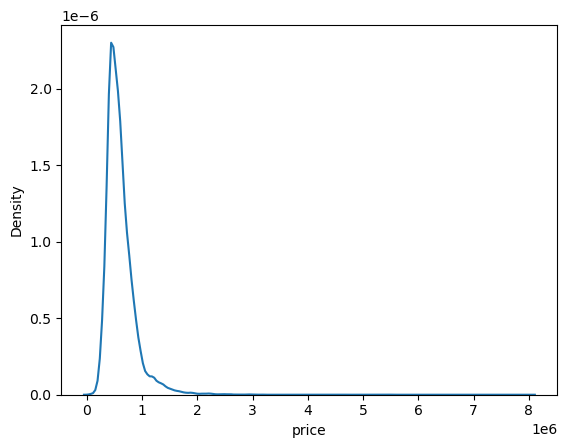

In [29]:
sns.kdeplot(data.price)

In [30]:
data['price_transform'] = np.log(data.price)

In [31]:
data.price_transform.skew()

np.float64(0.4731646269984763)

In [32]:
outliers = find_anomalies(data.price_transform)

In [35]:
print(len(outliers)) # I may have done some mistake here bcuz outliers should be less than, I will cover this in my upcoming project

29580
